scvis Testing
---

In [1]:
import sys
sys.path.append('../')
from fcc_DRs import *

Using TensorFlow backend.
/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


In [34]:
latent = pd.read_csv('scvis_out/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', sep='\t', index_col=0)
latent = np.array(latent)
latent = latent.copy(order='C')

In [35]:
test_scvis_results = DR(matrix=latent)
test_scvis_results.results = latent
test_scvis_results.clu = Cluster(latent.astype('double'), autoplot=False)
test_scvis_results.name = 'scvis'

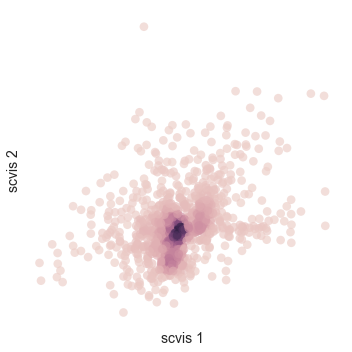

In [36]:
test_scvis_results.plot()

In [38]:
# read in counts fed into scvis
P14Retina_0 = RNA_counts.from_file(datafile='../inputs/GSM1626793_P14Retina_1.1kcells.tsv')

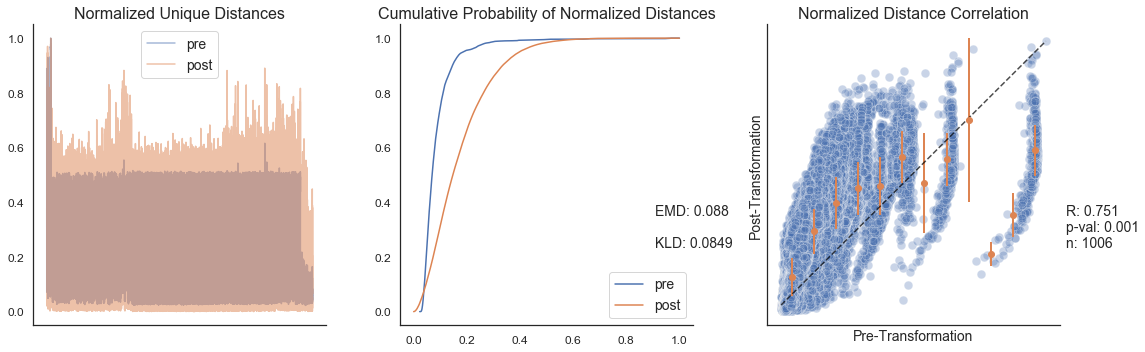

Knn Preservation: 96.2367

CPU times: user 29.6 s, sys: 4.18 s, total: 33.8 s
Wall time: 33.3 s


In [41]:
%%time

k=30
# look at scvis vs 500-feature dataset 
# transform==None for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform=None), 
                                  post=test_scvis_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform=None), 
                                                       post=test_scvis_results.knn_graph(k))))

---

Continuous Dataset
---

In [50]:
latent = pd.read_csv('scvis_out/qi/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', sep='\t', index_col=0)
latent = np.array(latent)
latent = latent.copy(order='C')

In [51]:
test_scvis_results = DR(matrix=latent)
test_scvis_results.results = latent
test_scvis_results.clu = Cluster(latent.astype('double'), autoplot=False)
test_scvis_results.name = 'scvis'

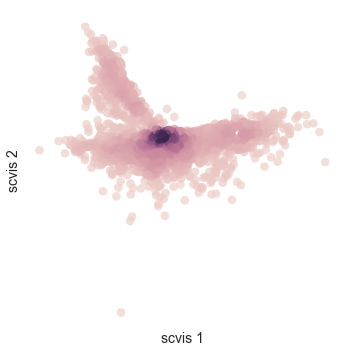

In [52]:
test_scvis_results.plot()

In [53]:
# read in counts fed into scvis
qi = RNA_counts.from_file(datafile='../inputs/qi_s1_edited_all.500feature.tsv')

../fcc_utils.py:143: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:144: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


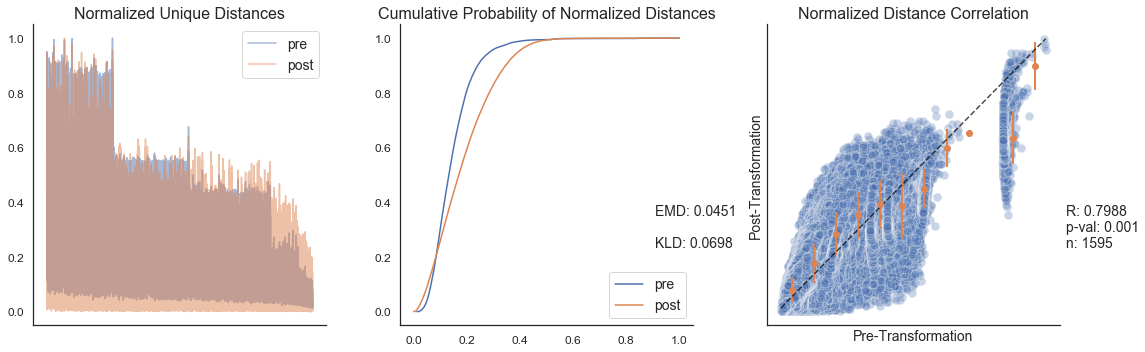

Knn Preservation: 98.1223

CPU times: user 1min 19s, sys: 7.52 s, total: 1min 27s
Wall time: 1min 27s


In [54]:
%%time

k=30
# look at scvis vs 500-feature dataset 
# transform==None for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform=None), 
                                  post=test_scvis_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform=None), 
                                                       post=test_scvis_results.knn_graph(k))))